In [1]:
import scipy
print(scipy.__version__)

1.16.1


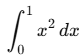

In [2]:
import numpy as np
from scipy import integrate

# Define a simple function
def integrand(x):
    return x**2

# Compute the integral of the function
result, _ = integrate.quad(integrand, 0, 1)
print("Integral of x^2 from 0 to 1:", result)

Integral of x^2 from 0 to 1: 0.33333333333333337


In [ ]:
from scipy.optimize import minimize

def cost_function(x):
    return (x - 3)**2 + 5

result = minimize(cost_function, x0=0)
print("Minimum value at x =", result.x)

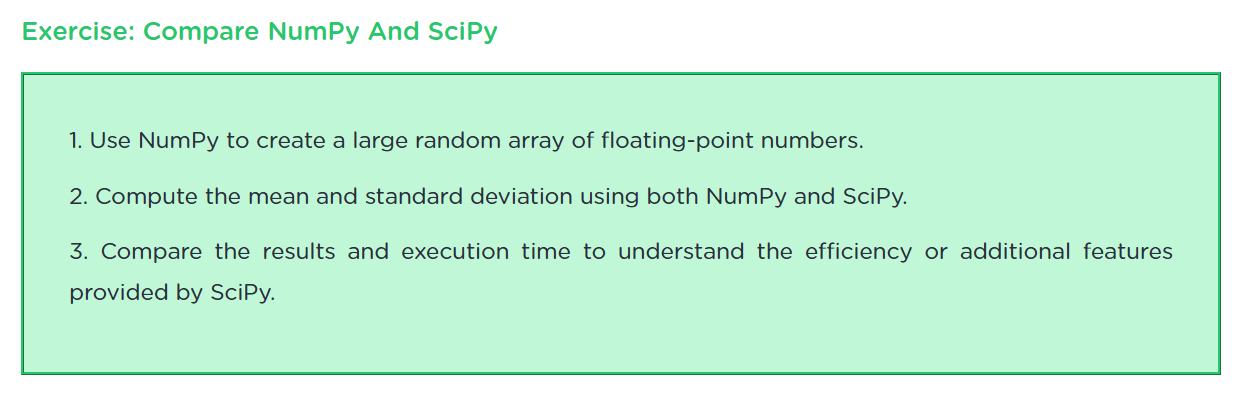

In [1]:
import numpy as np
from scipy import stats as sp
import time

data = np.random.rand(1000000)

start_np=time.time()
mean_np = np.mean(data)
std_dev_np = np.std(data)
end_np=time.time()
time_np = end_np - start_np


start_sp=time.time()
mean_sp = sp.tmean(data)
std_dev_sp = sp.tstd(data)
end_sp=time.time()
time_sp = end_sp - start_sp

print("NumPy Mean:", mean_np)
print("SkiPy Mean:", mean_sp)
print("NumPy Std Dev:", std_dev_np)
print("SkiPy Std Dev:", std_dev_sp)
print("NumPy Time:", time_np)
print("SkiPy Time:", time_sp)






NumPy Mean: 0.49975374740381034
SkiPy Mean: 0.49975374740381034
NumPy Std Dev: 0.2886451571037227
SkiPy Std Dev: 0.2886453014264095
NumPy Time: 0.0
SkiPy Time: 0.02134561538696289


In [2]:
import numpy as np
import scipy.stats as stats

daily_steps = np.random.randint(3000, 10000, size=50)

mean_np = np.mean(daily_steps)
median_np = np.median(daily_steps)
variance_np = np.var(daily_steps)
std_dev_np = np.std(daily_steps)



mean_scipy = stats.tmean(daily_steps)
median_scipy = np.median(daily_steps)  # SciPy does not have a separate median function
variance_scipy = stats.tvar(daily_steps)
std_dev_scipy = stats.tstd(daily_steps)

print("Mean:     NumPy =", mean_np, " | SciPy =", mean_scipy)
print("Median:   NumPy =", median_np)
print("Variance: NumPy =", variance_np, " | SciPy =", variance_scipy)
print("Std Dev:  NumPy =", std_dev_np, " | SciPy =", std_dev_scipy)

skewness = stats.skew(daily_steps)
kurtosis = stats.kurtosis(daily_steps)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean:     NumPy = 6844.54  | SciPy = 6844.54
Median:   NumPy = 6950.5
Variance: NumPy = 3617742.5283999997  | SciPy = 3691574.0085714282
Std Dev:  NumPy = 1902.0364161603216  | SciPy = 1921.3469256153164
Skewness: -0.5761584138302713
Kurtosis: -0.65188505540609


In [3]:
import numpy as np

# Sample data
group_a_scores = np.array([75, 88, 91, 83, 85])
group_b_scores = np.array([79, 90, 87, 88, 90])

# Calculate means
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)
print("Mean of Group A:", mean_a)
print("Mean of Group B:", mean_b)

Mean of Group A: 84.4
Mean of Group B: 86.8


In [4]:
# Calculate standard deviation
std_a = np.std(group_a_scores, ddof=0)
std_b = np.std(group_b_scores, ddof=0)
print("Standard Deviation of Group A:", std_a)
print("Standard Deviation of Group B:", std_b)

Standard Deviation of Group A: 5.4258639865002145
Standard Deviation of Group B: 4.069397989875161


In [5]:
from scipy.stats import ttest_ind

# Perform T-test
t_stat, p_val = ttest_ind(group_a_scores, group_b_scores)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -0.7077213895435037
P-value: 0.4992141336832657


In [6]:
from scipy.stats import t
df = 8
alpha = 0.05
tcrit_two = t.ppf(1 - alpha/2, df)  # ≈ 2.306 ppf = percent point function
tcrit_one = t.ppf(1 - alpha,   df)  # ≈ 1.860
print(tcrit_two, tcrit_one)

2.306004135204166 1.8595480375228421


In [7]:
critical_value = 2.306  # From T-table or Python function

if abs(t_stat) > critical_value or p_val < 0.05:
  print("The difference is statistically significant.")
else:
  print("The difference is not statistically significant.")




The difference is not statistically significant.


In [3]:
from sklearn.datasets import load_iris
from scipy.stats import ttest_ind
import pandas as pd

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Extract petal lengths for Setosa and Versicolor
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Perform T-test
t_stat, p_val = ttest_ind(setosa_petal_length, versicolor_petal_length)

# Output the T-statistic and P-value
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)

Iris Petal Length Comparison: T-statistic = -39.492719391538095 P-value = 5.404910513441677e-62


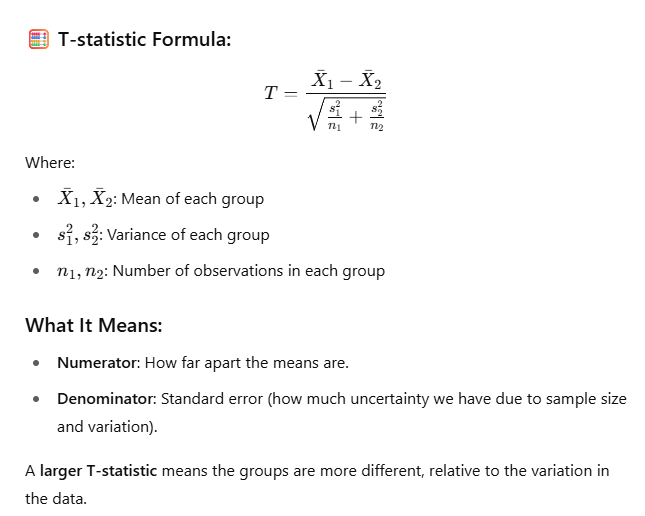